In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df. shape

(8509, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8509 entries, 0 to 8508
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              8509 non-null   int64  
 1   ObservationDate  8509 non-null   object 
 2   Province/State   4761 non-null   object 
 3   Country/Region   8509 non-null   object 
 4   Last Update      8509 non-null   object 
 5   Confirmed        8509 non-null   float64
 6   Deaths           8509 non-null   float64
 7   Recovered        8509 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 531.9+ KB


In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

In [6]:
from datetime import date


india=df.loc[df['Country/Region']=='India']
india['date'] = india['ObservationDate'].dt.date
india['date']=pd.to_datetime(india['date'])
india = india[india['date'] > pd.Timestamp(date(2020,1,22))]
india=india.groupby('date')["Confirmed", "Recovered", "Deaths"].sum().reset_index()
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       55 non-null     datetime64[ns]
 1   Confirmed  55 non-null     int32         
 2   Recovered  55 non-null     int32         
 3   Deaths     55 non-null     int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 1.2 KB


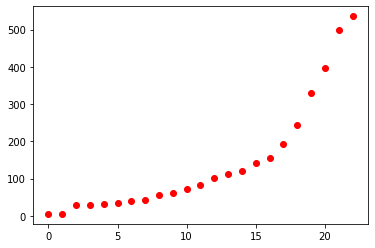

In [7]:
graph=india[32:]
days=np.arange(0, len(graph), 1)
plt.scatter(days, graph['Confirmed'], color='r')

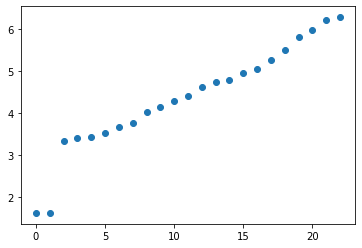

In [8]:

plt.scatter(days, np.log(graph['Confirmed']))

In [9]:
X=days
Y=np.log(graph['Confirmed'])

m=c=0 #m is slope and c is the y intercept of the line
L=0.001 #the learning rate
epochs = 100000  # The number of iterations to perform gradient descent
n=len(india) #number of elements in training dataset

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X+ c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print(m)

0.1959500112635901


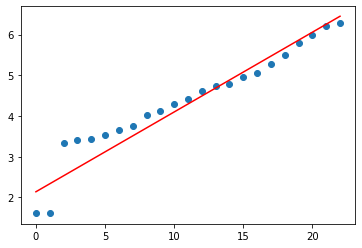

In [10]:
Y_pred = m*X+ c
plt.scatter(X, Y) 
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

In [11]:
test=np.arange(21, 29, 1)
pred=m*test+c
np.exp(pred)

array([ 520.50779261,  633.18008149,  770.24210066,  936.97339979,
       1139.79637202, 1386.52364087, 1686.65899794, 2051.76348349])

In [19]:
1.0+m*14+m**2*24

4.282338490457976